# Exploratory Data Analysis 

The main objectives of this notebook are:
- Explore the clean dataset through univariate analysis 
- Investigate correlations between features and crude price 
- Extract relevant insights 
- Understand steps that will be necessary during feature engineering

# Imports 

In [560]:
import pandas as pd
import sys 
import os 

# sys.path.insert(0,'/Users/andre/Desktop/Code/Quant_Trading/oil_model/utils/') 
# Path needs to be added manually to read from another folder
path2add = os.path.normpath(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), os.path.pardir, "utils"))
)
if not (path2add in sys.path):
    sys.path.append(path2add)

from eda import *

# Data 

In [561]:
features_df = pd.read_csv("../data/cleaned_dataset.csv")
features_df.set_index(features_df['Date'],inplace=True)
features_df.drop(columns='Date',inplace=True)

In [562]:
features_df.head()

,crude_price,sp_500,vix,usd,libya_oil_production,kazak_oil_production,qatar_oil_production,iran_oil_production,kuwait_oil_production,uae_oil_production,saudi_oil_production,iraq_oil_production,world_oil_consumption,usa_oil_production
Date,,,,,,,,,,,,,,
2002-01-01,20.605000,1155.2500,22.270000,117.885000,1.383184e+06,972101.1616,694246.5753,3248200.0,1.745866e+06,1930000.0,7090000.0,1823000.0,43650.734,5873000.0
2002-01-02,21.010000,1154.0000,22.709999,116.269997,1.383184e+06,972101.1616,694246.5753,3248200.0,1.745866e+06,1930000.0,7090000.0,1823000.0,43650.734,5873000.0
2002-01-03,20.370001,1166.7500,21.340000,116.540001,1.383184e+06,972101.1616,694246.5753,3248200.0,1.745866e+06,1930000.0,7090000.0,1823000.0,43650.734,5873000.0
2002-01-04,21.620001,1175.2500,20.450001,116.750000,1.383184e+06,972101.1616,694246.5753,3248200.0,1.745866e+06,1930000.0,7090000.0,1823000.0,43650.734,5873000.0
2002-01-05,20.710001,1161.3125,22.075000,116.692499,1.383184e+06,972101.1616,694246.5753,3248200.0,1.745866e+06,1930000.0,7090000.0,1823000.0,43650.734,5873000.0


In [563]:
features_df.shape

(7677, 14)

In [564]:
features_df.describe()

,crude_price,sp_500,vix,usd,libya_oil_production,kazak_oil_production,qatar_oil_production,iran_oil_production,kuwait_oil_production,uae_oil_production,saudi_oil_production,iraq_oil_production,world_oil_consumption,usa_oil_production
count,7677.000000,7677.000000,7677.000000,7677.000000,7.677000e+03,7.677000e+03,7677.000000,7.677000e+03,7.677000e+03,7.677000e+03,7.677000e+03,7.677000e+03,7677.000000,7.677000e+03
mean,65.799831,1927.035045,19.760211,89.648303,1.172555e+06,1.546025e+06,690440.347981,3.310999e+06,2.578797e+06,2.638304e+06,9.304727e+06,3.039460e+06,49203.975782,7.717921e+06
std,24.918388,992.785965,8.827868,9.643765,5.311239e+05,2.462312e+05,85291.161145,6.451183e+05,2.998877e+05,3.043158e+05,8.346796e+05,1.076824e+06,2825.624022,2.618818e+06
min,-37.630001,676.000000,9.140000,71.304001,3.000000e+05,9.721012e+05,551000.000000,2.024333e+06,1.745866e+06,1.930000e+06,7.090000e+06,1.160841e+06,43650.734000,3.974000e+06
25%,47.062001,1183.000000,13.630000,81.380997,8.100000e+05,1.380822e+06,607394.252100,2.764500e+06,2.414956e+06,2.380000e+06,8.900000e+06,2.035000e+06,47468.766000,5.423000e+06
50%,62.549999,1474.850000,17.379999,89.436002,1.206667e+06,1.627397e+06,697774.541100,3.621000e+06,2.677655e+06,2.632083e+06,9.310000e+06,2.950000e+06,48745.684000,6.370000e+06
75%,86.221997,2494.500000,23.030001,96.390002,1.688000e+06,1.729336e+06,752100.000000,3.814750e+06,2.736603e+06,2.875000e+06,9.810000e+06,3.997910e+06,51530.492000,9.668000e+06
max,145.289993,4786.000000,82.690002,120.589996,1.844703e+06,1.857534e+06,836860.000000,4.094000e+06,2.977384e+06,3.065250e+06,1.058850e+07,4.633250e+06,54564.000000,1.300000e+07


In [565]:
features_df.dtypes

crude_price              float64
sp_500                   float64
vix                      float64
usd                      float64
libya_oil_production     float64
kazak_oil_production     float64
qatar_oil_production     float64
iran_oil_production      float64
kuwait_oil_production    float64
uae_oil_production       float64
saudi_oil_production     float64
iraq_oil_production      float64
world_oil_consumption    float64
usa_oil_production       float64
dtype: object

In [566]:
features_df.columns

Index(['crude_price', 'sp_500', 'vix', 'usd', 'libya_oil_production',
       'kazak_oil_production', 'qatar_oil_production', 'iran_oil_production',
       'kuwait_oil_production', 'uae_oil_production', 'saudi_oil_production',
       'iraq_oil_production', 'world_oil_consumption', 'usa_oil_production'],
      dtype='object')

# Univariate Analysis 

This section will plot each feature using a kernel density estimation to see the data's distribution. It will provide a fundamental understanding of the data's distribution 

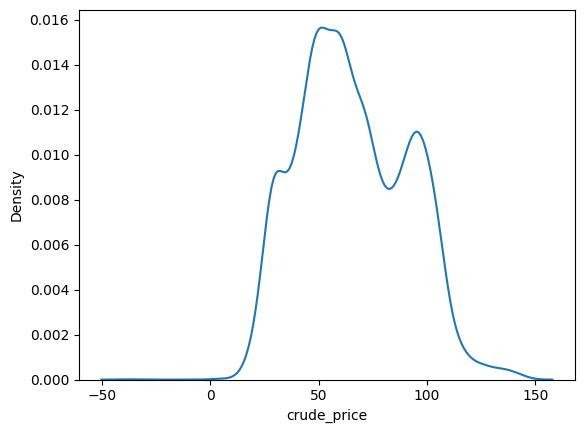

In [567]:
kde(features_df,features_df['crude_price'])

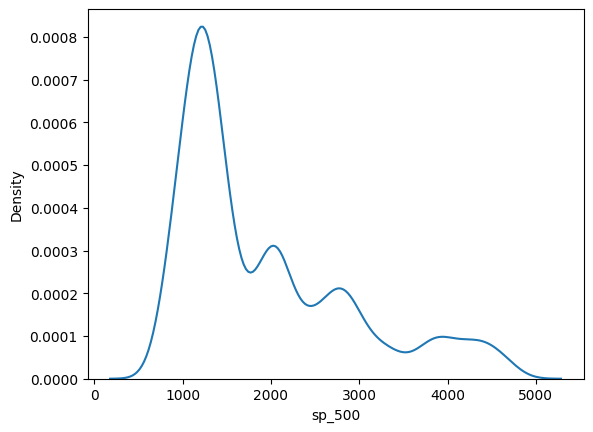

In [568]:
kde(features_df,features_df['sp_500'])

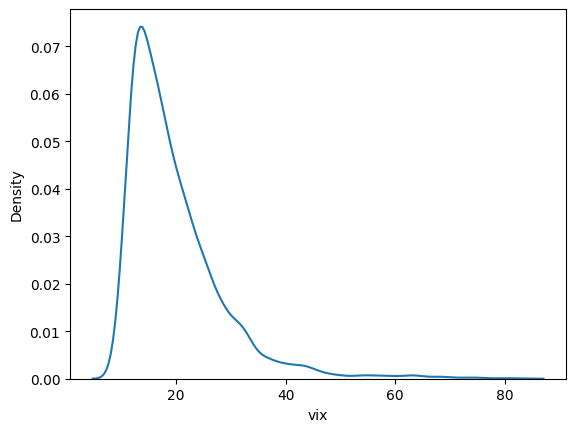

In [569]:
kde(features_df,features_df['vix'])

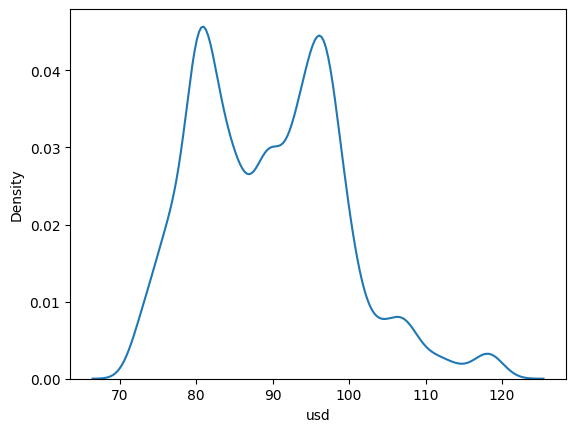

In [570]:
kde(features_df,features_df['usd'])

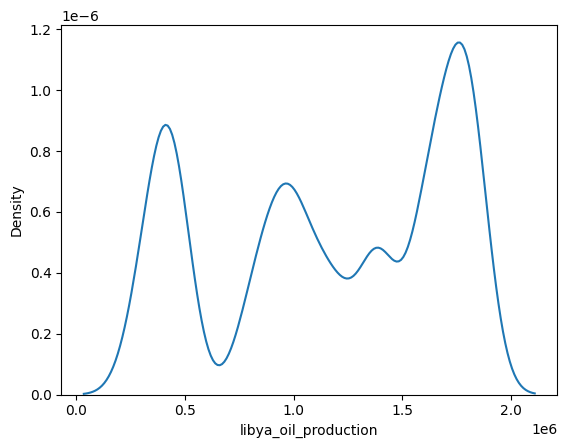

In [571]:
kde(features_df,features_df['libya_oil_production'])

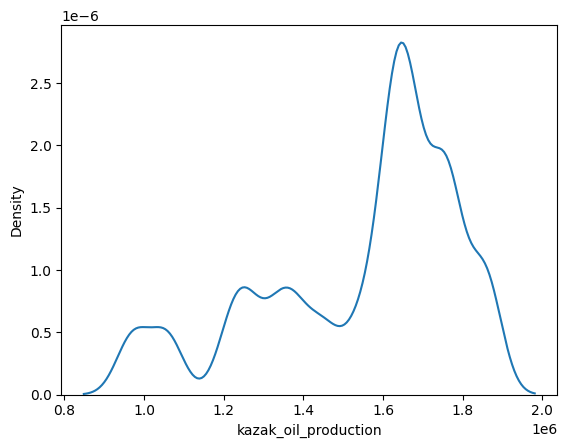

In [572]:
kde(features_df,features_df['kazak_oil_production'])

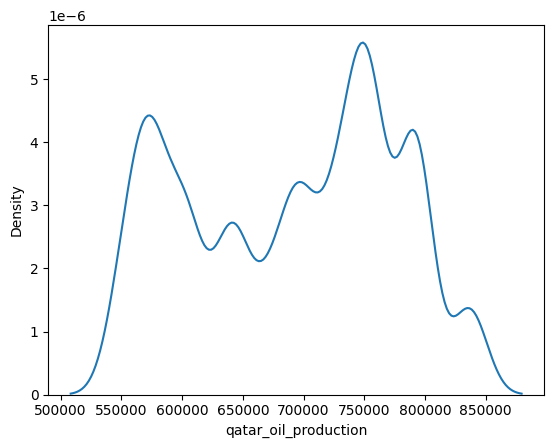

In [573]:
kde(features_df,features_df['qatar_oil_production'])

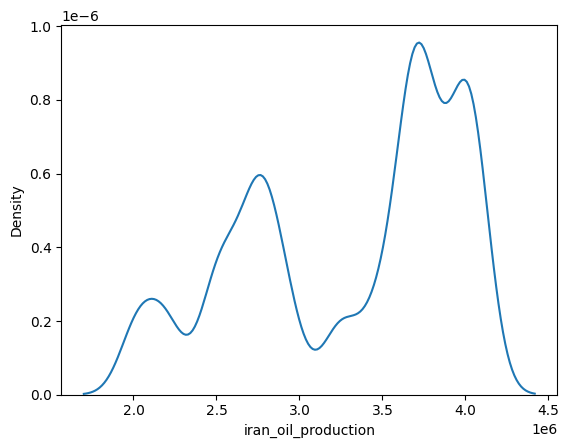

In [574]:
kde(features_df,features_df['iran_oil_production'])

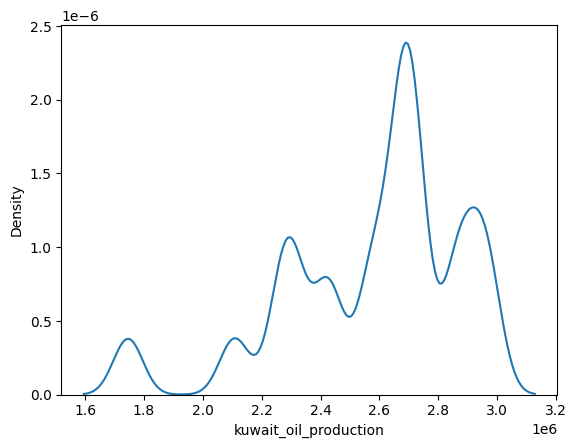

In [575]:
kde(features_df,features_df['kuwait_oil_production'])

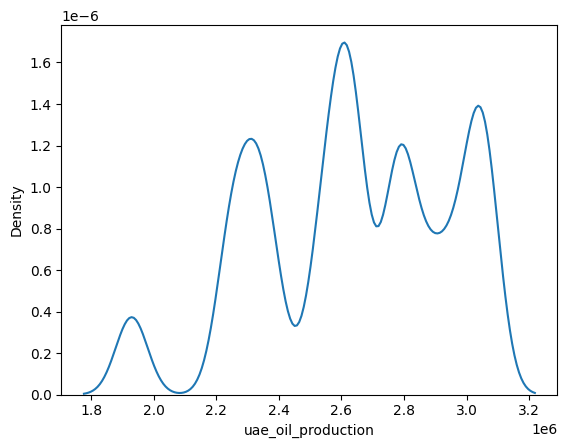

In [576]:
kde(features_df,features_df['uae_oil_production'])

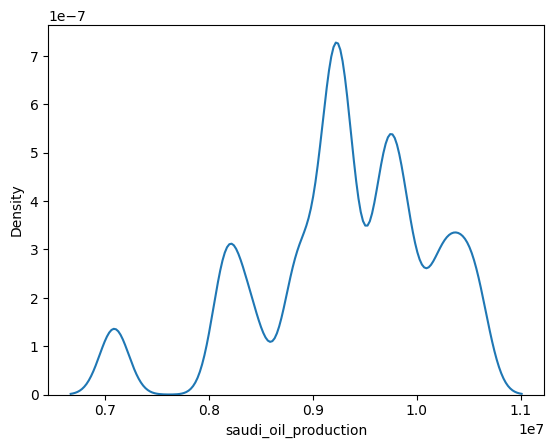

In [577]:
kde(features_df,features_df['saudi_oil_production'])

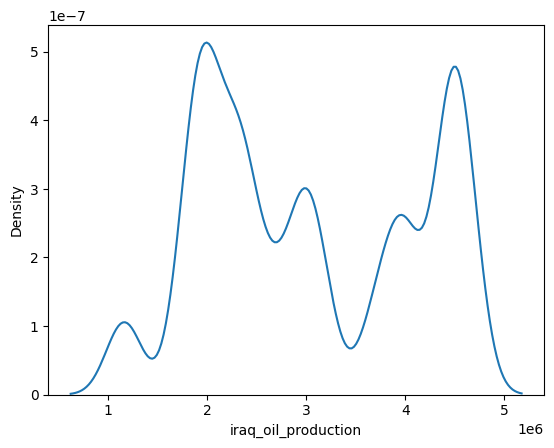

In [578]:
kde(features_df,features_df['iraq_oil_production'])

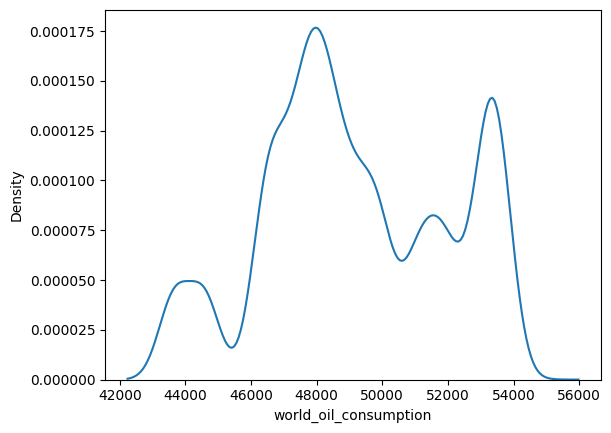

In [579]:
kde(features_df,features_df['world_oil_consumption'])

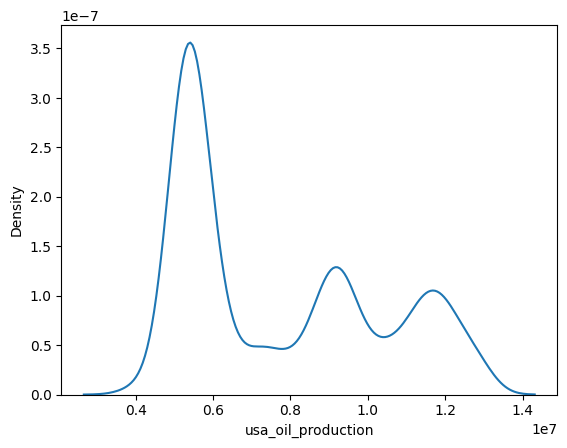

In [580]:
kde(features_df,features_df['usa_oil_production'])

Observations 
- 

# Correlation heat map 

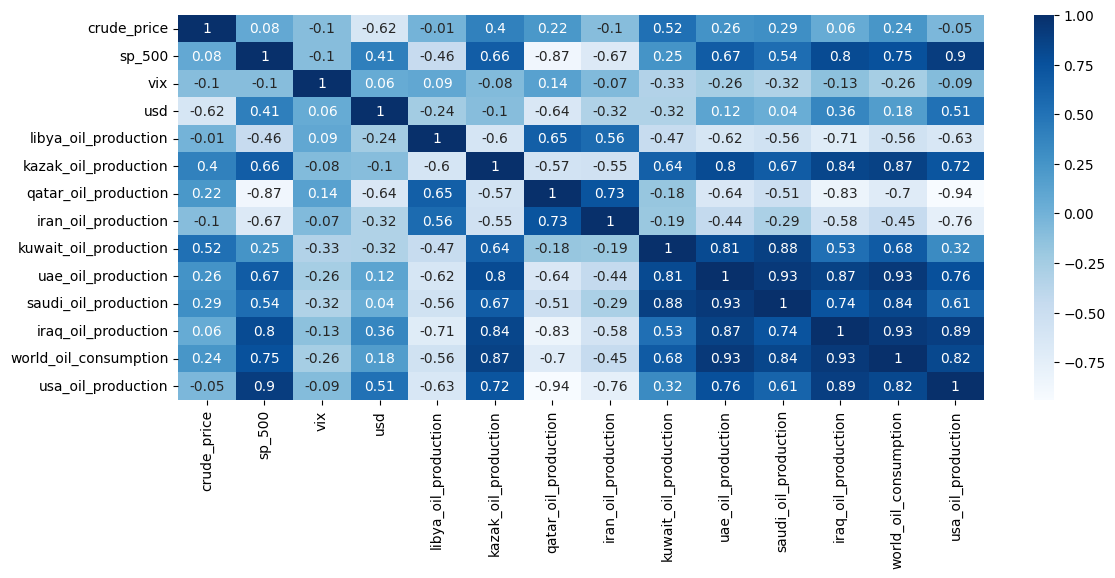

In [581]:
heat_map(features_df)